<a href="https://colab.research.google.com/github/pizzapuppies/FYP_code/blob/main/Predicted%20dataCNN_for_dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

predictive ANN for solution


In [ ]:
! pip install impedance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd 
import os
import tensorflow as tf
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv
import random

import sys
from impedance.models.circuits import Randles

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
mat = [[1,2,3],[4,5,6]]

def split23(li):
  g = []
  for i in range(1,len(li),3):
    g.append(li[i:i+3])
  return g

In [ ]:
X = []

with open('/content/gdrive/My Drive/FYP Dengue data - Sheet1.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  line_count = 0
    
  for i in csv_reader:
    if line_count == 0:
      for j in range(len(split23(i))):
        X.append([])
      
    line_count += 1
    if i[0] in ["index","conc","label"]:
            if i[0] == "label":
              y = split23(i)
    else:
      li = split23(i)
      
      for ind,dat in enumerate(li):
        com = list(map(float,dat[1:]))
        X[ind].append(complex(com[0],com[1]))
        



for i,li in enumerate(y):
  if li[0] == "1":
    y[i] = 1
  else:
    y[i] = 0

X = np.array(X)
y = np.array(y)

temp = list(zip(X, y))
random.shuffle(temp)
X, y = zip(*temp)
X, y = list(X), list(y)
X = np.array(X).astype('complex')
y = np.array(y)

In [ ]:
# takes in data [real and im] as np.array.astype('complex') and then returns predicted ideal results as complex np.array 

def fit2circuit(data):
  f = [99998.5, 74371.3, 55310.2, 41135.8, 30593.9, 22752.8, 16922.0, 12584.9, 9359.6, 6960.87, 5176.9, 3850.1, 2863.41, 2129.55, 1583.81, 1177.91, 876.024, 651.509, 484.549, 360.37, 268.005, 199.318, 148.237, 110.25, 81.9936, 60.9793, 45.3517, 33.7288, 25.0842, 18.6553, 13.8746, 10.3188, 7.6741, 5.70749, 4.24474, 3.15689, 2.34786, 1.74614, 1.29861, 0.96584, 0.718283, 0.534201, 0.397296, 0.295477, 0.219748, 0.163429, 0.121549, 0.0903947, 0.067228, 0.0499995]
  f = np.asarray(f).astype('float32')
  cc = Randles(initial_guess=[.01, .005, .1, .12, .01])
  cc.fit(f,data)
  return cc.predict(f)


d = [(456.614+5.15737j), (456.052+4.29894j), (456.642+3.62846j), (460.374+9.14462j), (459.369+7.62981j), (458.905+6.7184j), (458.863+6.79895j), (458.979+7.21057j), (458.68+8.4258j), (459.4+9.7113j), (461.016+11.6499j), (462.358+13.7423j), (463.716+16.657j), (465.457+20.3876j), (467.5+24.9583j), (469.859+30.6567j), (472.371+37.9513j), (475.071+47.2265j), (477.812+59.4829j), (480.762+75.8991j), (483.914+98.0304j), (488.47+128.113j), (494.322+168.247j), (503.491+221.642j), (517.9+292.234j), (541.164+384.513j), (577.726+503.152j), (638.534+653.87j), (735.564+840.148j), (886.934+1059.35j), (1112.99+1302.57j), (1430+1537.69j), (1836.09+1722.72j), (2303.24+1820.87j), (2784.58+1813.57j), (3220.81+1714.54j), (3585.57+1565.3j), (3879.68+1403.94j), (4100.63+1255.6j), (4294.17+1133.87j), (4453.83+1049.62j), (4592.24+998.987j), (4734.68+979.607j), (4867.17+994.283j), (5027.21+1018.72j), (5204.81+1083.78j), (5344.6+1152.85j), (5535.5+1273.64j), (5712.74+1395.56j), (5967.15+1530.75j)]

d = np.asarray(d).astype('complex')
pred = fit2circuit(d)




In [ ]:
# takes in randomized X and tries to produce Complex np.arrays 
#print(X[0])
X_total = []
for i in range(len(X)):
  com = fit2circuit(X[i])
  li = []
  for j in com:
   li.append([j.real,j.imag])  
  X_total.append(li)
print(X_total)

[[[719.1776825957008, -1.3627027203669693], [719.178515192049, -1.8322682371201289], [719.1800206336378, -2.4637056653782], [719.1827420602443, -3.3126338316617665], [719.1876620546209, -4.454073248127276], [719.1965581221305, -5.989012158568653], [719.2126392602962, -8.0525696953001], [719.2417166951683, -10.827529910649298], [719.2942818778386, -14.558252045538941], [719.3893102136115, -19.57402183120783], [719.5610917125597, -26.316760074042996], [719.8715944798383, -35.379794660322425], [720.432654612058, -47.55634885264965], [721.4461894832688, -63.90865157642994], [723.2755317295964, -85.84257139189931], [726.5735509932044, -115.2116131861673], [732.5058449417753, -154.40249053001], [743.1322533341743, -206.37730044766357], [762.0248819622856, -274.53963218633953], [795.1824265197806, -362.1843351100437], [852.0696111191928, -470.9549069320732], [945.9317333964462, -597.6376973838466], [1091.2982407378443, -729.4170862302117], [1295.7221880719153, -840.517310297369], [1547.437033

impedance py did the math but did not output the parameters

In [ ]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_total,y, test_size=0.10)

X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_train = np.asarray(Y_train).astype('float32').reshape((-1,1))
Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))

print("\nTrain Test Dimensions:\n------------------------------------")
print("shape of training set",X_train.shape, Y_train.shape)
print("shape of testing set",X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
shape of training set (126, 50, 2) (126, 1)
shape of testing set (14, 50, 2) (14, 1)


In [ ]:
from tensorflow import keras



In [ ]:
#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

In [ ]:
#Add the first hidden layer
model.add(keras.layers.Dense(128,         #Number of nodes
                        input_shape=(50,2), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(tf.keras.layers.Conv1D(
    2,3,activation='relu'
))
model.add(tf.keras.layers.Flatten())

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-3',
                              activation='relu'))



#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-4',
                              activation='relu'))




In [ ]:
model.add(keras.layers.Dense(1,
                             name='Output-Layer',
                             activation='sigmoid'))

#model.summary()

In [ ]:
#Compile the model with loss & metrics
model.compile(loss= tf.keras.losses.BinaryCrossentropy() ,
              metrics=['accuracy'])

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=10
#Set number of epochs
EPOCHS=20
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Training Progress:
------------------------------------
Epoch 1/20
10/10 [==============================] - 1s 21ms/step - loss: 1.3703 - accuracy: 0.5100 - val_loss: 0.6935 - val_accuracy: 0.4615
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5200 - val_loss: 0.6939 - val_accuracy: 0.4615
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5200 - val_loss: 0.6942 - val_accuracy: 0.4615
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5200 - val_loss: 0.6944 - val_accuracy: 0.4615
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5200 - val_loss: 0.6945 - val_accuracy: 0.4615
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6946 - val_accuracy: 0.4615
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5200 - va

In [ ]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
z = model.evaluate(X_test,Y_test)
print("The accuracy of the model is ",round(z[1]*100)," %")


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 14ms/step - loss: 0.6980 - accuracy: 0.4286
The accuracy of the model is  43  %



Accuracy during Training :
------------------------------------


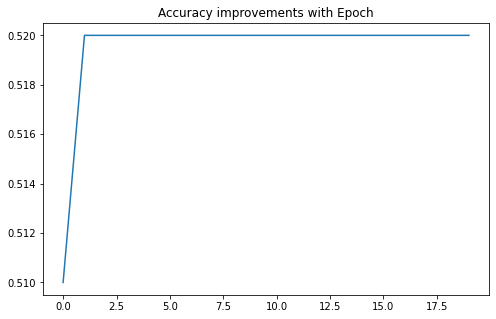

In [ ]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()